# Load the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from Modules.Distributions import Gaussian1D
from Modules.Metrics import Accuracy, Precision, Recall, F1score
from Modules.SupervisedLearning import NaiveBayesClassifier, BayesClassifier, kNNClassifier, ParzenWindow
from Modules.UnsupervisedLearning import kmeansClassifier
from Modules.Visualizers import VisualizePCA, PCA

# Load Railway dataset

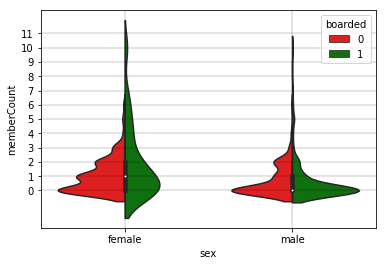

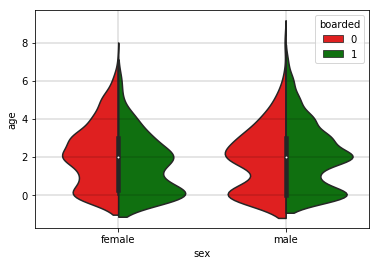

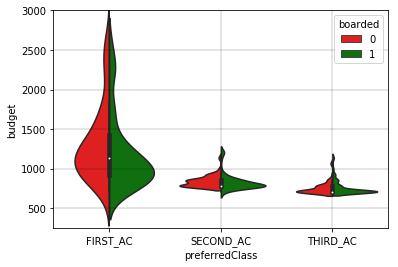

In [2]:
railway_data = pd.read_csv("data/railwayBookingList.csv")

railway_data = railway_data.dropna()

fig, ax = plt.subplots()
sns.violinplot(x = railway_data["sex"], y = railway_data["memberCount"], hue = railway_data["boarded"],
               split = True, palette = {0: "r", 1: "g"})
plt.yticks(range(0, 12))
ax.grid(linestyle = "-", linewidth = '0.2', color='black')

fig, ax = plt.subplots()
sns.violinplot(x = railway_data["sex"], y = railway_data["age"], hue = railway_data["boarded"],
               split = True, palette = {0: "r", 1: "g"})
ax.grid(linestyle = "-", linewidth = '0.2', color='black')

fig, ax = plt.subplots()
sns.violinplot(x = railway_data["preferredClass"], y = railway_data["budget"], hue = railway_data["boarded"],
               split = True, palette = {0: "r", 1: "g"})
plt.ylim(250, 3000)
ax.grid(linestyle = "-", linewidth = '0.2', color='black')

railway_data.loc[railway_data["sex"] == "male", "sex"] = 1
railway_data.loc[railway_data["sex"] == "female", "sex"] = 0

railway_data.loc[railway_data["preferredClass"] == "FIRST_AC", "preferredClass"] = 0
railway_data.loc[railway_data["preferredClass"] == "SECOND_AC", "preferredClass"] = 1
railway_data.loc[railway_data["preferredClass"] == "THIRD_AC", "preferredClass"] = 2

# Construct new feature indicating amount paid by the person (is 0 if not boarded, else is split equally among the members)
# railway_data["fare"] = railway_data["budget"] / (railway_data["memberCount"] + 1)

x = railway_data.drop(["caseID", "boarded"], axis = 1).values
y = railway_data["boarded"].values

x_ = (x - x.mean(axis = 0)) / np.sqrt(x.var(axis = 0))

x_train = x[:1178, :]
y_train = y[:1178]

x_test = x[1178:, :]
y_test = y[1178:]

# Naive Bayes classifier (MLE)

Training accuracy: 0.7792869269949066
Test Accuracy = 0.8396946564885496
Precision = {0: array([0.62962963]), 1: array([0.89423077])}
Recall = {0: array([0.60714286]), 1: array([0.90291262])}
F1score = {0: array([0.61818182]), 1: array([0.89855072])}


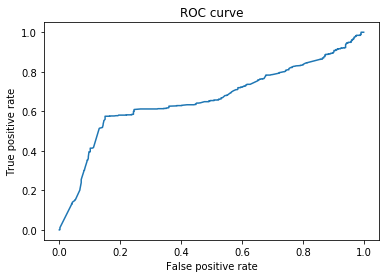

In [3]:
# Note that standardization doesn't affect this.

num_alphas = {
    0 : np.array([1, 1, 1, 1, 1]),
    1 : np.array([1, 1, 1, 1, 1]),
}

classifier = NaiveBayesClassifier(algorithm = "MLE")
classifier.Fit(x_train, y_train, num_alphas, roc_plot = True, label = 0)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

# Naive Bayes classifier (EM)

## This is not supposed to work as you cannot fit gaussians through categorical data.

In [4]:
# Note that standardization doesn't affect this.

num_alphas = {
    0 : np.array([2, 2, 2, 2, 2]),
    1 : np.array([2, 2, 2, 2, 2]),
}

classifier = NaiveBayesClassifier(algorithm = "EM")
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.400679117147708
Test Accuracy = 0.21374045801526717
Precision = {0: array([0.21374046]), 1: array([nan])}
Recall = {0: array([1.]), 1: array([0.])}
F1score = {0: array([0.35220126]), 1: array([nan])}


D:\Biohazard\Programming\Machine learning and deep learning\Assignments\ell409-assignment1\Modules\Estimators.py:35: RuntimeWarning: invalid value encountered in true_divide
  w /= w.sum(axis = 1, keepdims = True)
D:\Biohazard\Programming\Machine learning and deep learning\Assignments\ell409-assignment1\Modules\Metrics.py:20: RuntimeWarning: invalid value encountered in true_divide
  precision[i] = TP / temp.sum(axis = 0)


# Bayes classifier (MLE)

In [5]:
num_alphas = {
    0 : 1,
    1 : 1
}

classifier = BayesClassifier(algorithm = "MLE", inverse = False)
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.7775891341256367
Test Accuracy = 0.8396946564885496
Precision = {0: array([0.62962963]), 1: array([0.89423077])}
Recall = {0: array([0.60714286]), 1: array([0.90291262])}
F1score = {0: array([0.61818182]), 1: array([0.89855072])}


# Bayes classifier (EM)

## This is not supposed to work as you cannot fit gaussians through categorical data.

In [6]:
num_alphas = {
    0 : 2,
    1 : 2
}

classifier = BayesClassifier(algorithm = "EM")
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.400679117147708
Test Accuracy = 0.21374045801526717
Precision = {0: array([0.21374046]), 1: array([nan])}
Recall = {0: array([1.]), 1: array([0.])}
F1score = {0: array([0.35220126]), 1: array([nan])}


D:\Biohazard\Programming\Machine learning and deep learning\Assignments\ell409-assignment1\Modules\Estimators.py:80: RuntimeWarning: invalid value encountered in true_divide
  w = gaussians_ / gaussians_.sum(axis = 1, keepdims = True)
c:\users\mayank\appdata\local\conda\conda\envs\deep_learning\lib\site-packages\numpy\linalg\linalg.py:1874: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
D:\Biohazard\Programming\Machine learning and deep learning\Assignments\ell409-assignment1\Modules\Metrics.py:20: RuntimeWarning: invalid value encountered in true_divide
  precision[i] = TP / temp.sum(axis = 0)


## Instead try to make up for the non-invertability of ${\Sigma}$ matrix

In [7]:
num_alphas = {
    0 : 2,
    1 : 2
}

classifier = BayesClassifier(algorithm = "EM", inverse = False)
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.7775891341256367
Test Accuracy = 0.8396946564885496
Precision = {0: array([0.62962963]), 1: array([0.89423077])}
Recall = {0: array([0.60714286]), 1: array([0.90291262])}
F1score = {0: array([0.61818182]), 1: array([0.89855072])}


# Parzen window (hypercube window)

In [8]:
h_array = np.linspace(1, 20, num = 20)
accuracy = pd.DataFrame()
accuracy["h"] = h_array
acc = []
for h in h_array:
    classifier = ParzenWindow(h = h)
    classifier.Fit(x_train, y_train)
    acc.append(Accuracy(classifier.Predict(x_test), y_test))
accuracy["accuracy"] = acc

In [9]:
accuracy

,h,accuracy
0,1.0,0.709924
1,2.0,0.709924
2,3.0,0.740458
3,4.0,0.740458
4,5.0,0.740458
5,6.0,0.740458
6,7.0,0.740458
7,8.0,0.740458
8,9.0,0.786260
9,10.0,0.786260


Text(0.5,1,'Raiwaly data Parzen window (hypercube) performance vs window width')

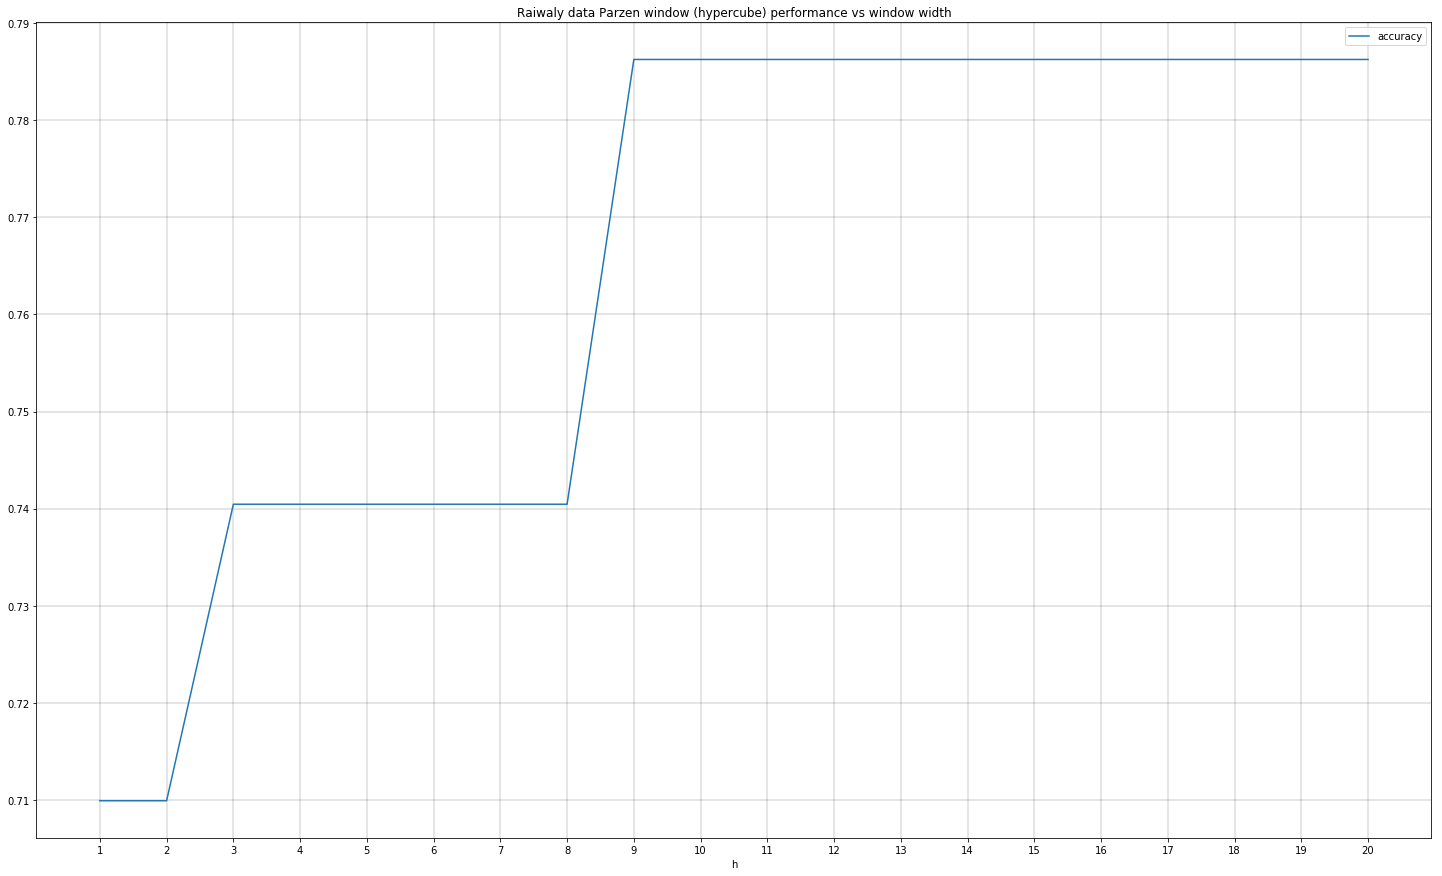

In [10]:
fig, ax = plt.subplots()
accuracy.plot(x = "h", y = "accuracy", figsize = [25, 15], ax = ax)
plt.xticks(h_array)
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Raiwaly data Parzen window (hypercube) performance vs window width")

# Parzen window (Gaussian window)

In [11]:
h_array = np.linspace(0.1,20, num = 30)
accuracy = pd.DataFrame()
accuracy["h"] = h_array
acc = []
for h in h_array:
    classifier = ParzenWindow(h = h, kernel = "Gaussian")
    classifier.Fit(x_train, y_train)
    acc.append(Accuracy(classifier.Predict(x_test), y_test))
accuracy["accuracy"] = acc

In [12]:
accuracy

,h,accuracy
0,0.100000,0.725191
1,0.786207,0.770992
2,1.472414,0.740458
3,2.158621,0.755725
4,2.844828,0.786260
5,3.531034,0.786260
6,4.217241,0.786260
7,4.903448,0.786260
8,5.589655,0.786260
9,6.275862,0.786260


Text(0.5,1,'Railway data Parzen window (Gaussian) performance vs window width')

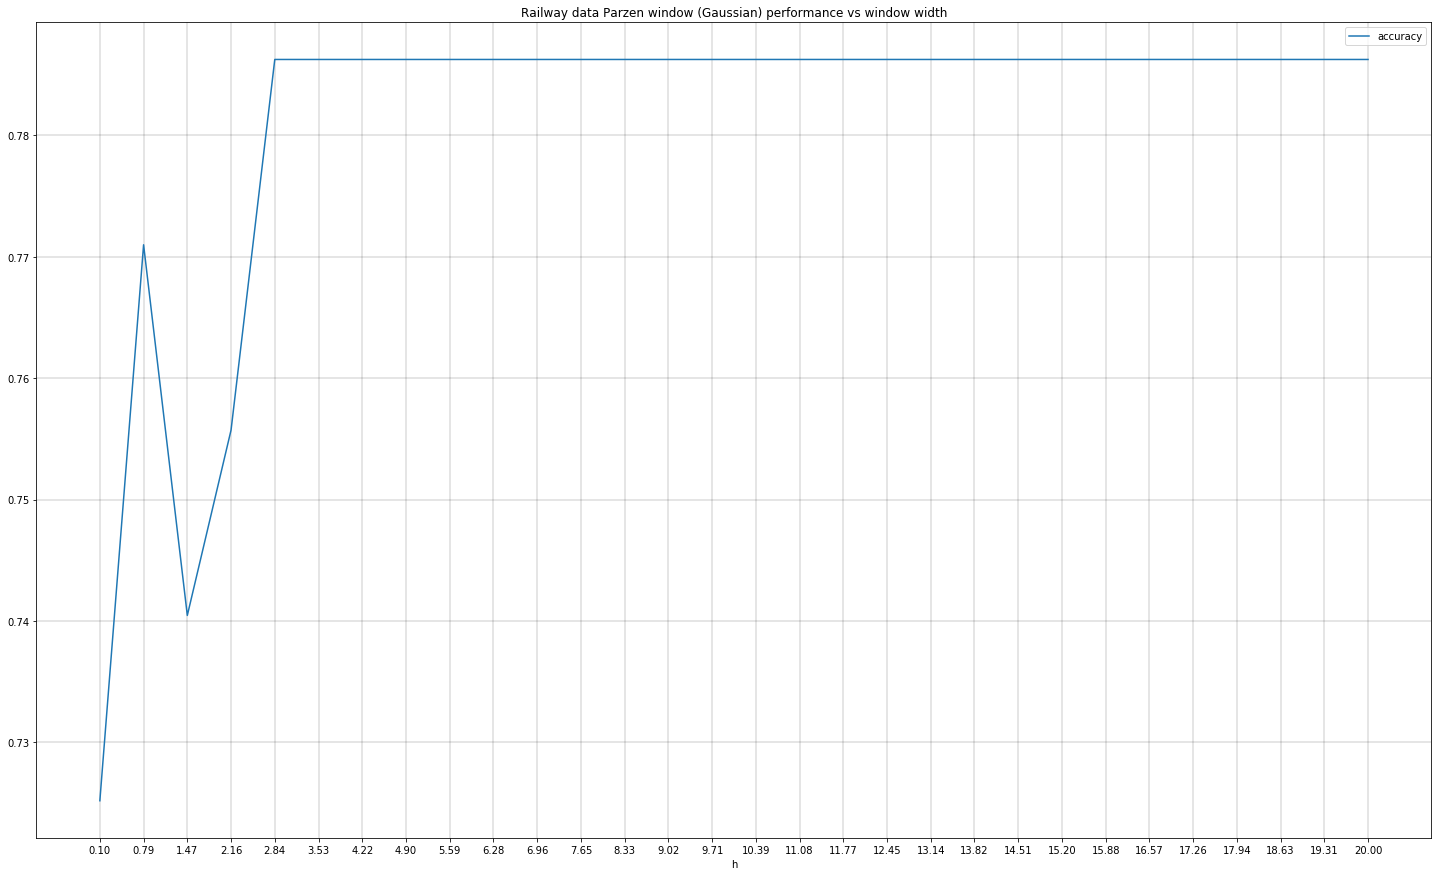

In [13]:
fig, ax = plt.subplots()
accuracy.plot(x = "h", y = "accuracy", figsize = [25, 15], ax = ax)
plt.xticks(h_array)
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Railway data Parzen window (Gaussian) performance vs window width")

# kNN

In [3]:
x_train = x_[:1178, :]
y_train = y[:1178]

x_test = x_[1178:, :]
y_test = y[1178:]

distance_metrics = ["Euclidean", "Manhattan", "Chebyshev", "Minkowski", "Hamming"]

accuracy = pd.DataFrame()
accuracy["k"] = range(1, 61)

precision = pd.DataFrame()
precision["k"] = range(1, 61)

recall = pd.DataFrame()
recall["k"] = range(1, 61)

f1_score = pd.DataFrame()
f1_score["k"] = range(1, 61)

for j in distance_metrics:
    classifier = kNNClassifier(distance_metric = j)

    accuracy_ = []
    precision_ = []
    recall_ = []
    f1_score_ = []
    for k in range(1, 61):
        predictions = classifier.Predict(x_train, y_train, x_test, k)
        predictions = np.array(predictions)
        accuracy_.append(Accuracy(predictions, y_test))
        precision_.append(Precision(predictions, y_test))
        recall_.append(Recall(predictions, y_test))
        f1_score_.append(F1score(predictions, y_test))
        
        print(k)
    
    accuracy[j] = accuracy_
    precision[j] = precision_
    recall[j] = recall_
    f1_score[j] = f1_score_

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [4]:
accuracy

,k,Euclidean,Manhattan,Chebyshev,Minkowski,Hamming
0,1,0.641221,0.641221,0.641221,0.641221,0.625954
1,2,0.664122,0.664122,0.664122,0.664122,0.641221
2,3,0.648855,0.641221,0.648855,0.648855,0.656489
3,4,0.793893,0.763359,0.786260,0.549618,0.748092
4,5,0.770992,0.786260,0.778626,0.740458,0.778626
5,6,0.801527,0.793893,0.786260,0.793893,0.770992
6,7,0.786260,0.763359,0.786260,0.770992,0.770992
7,8,0.770992,0.770992,0.786260,0.763359,0.763359
8,9,0.770992,0.763359,0.786260,0.755725,0.770992
9,10,0.778626,0.793893,0.809160,0.793893,0.770992


Text(0.5,1,'Railway data knn performance vs k')

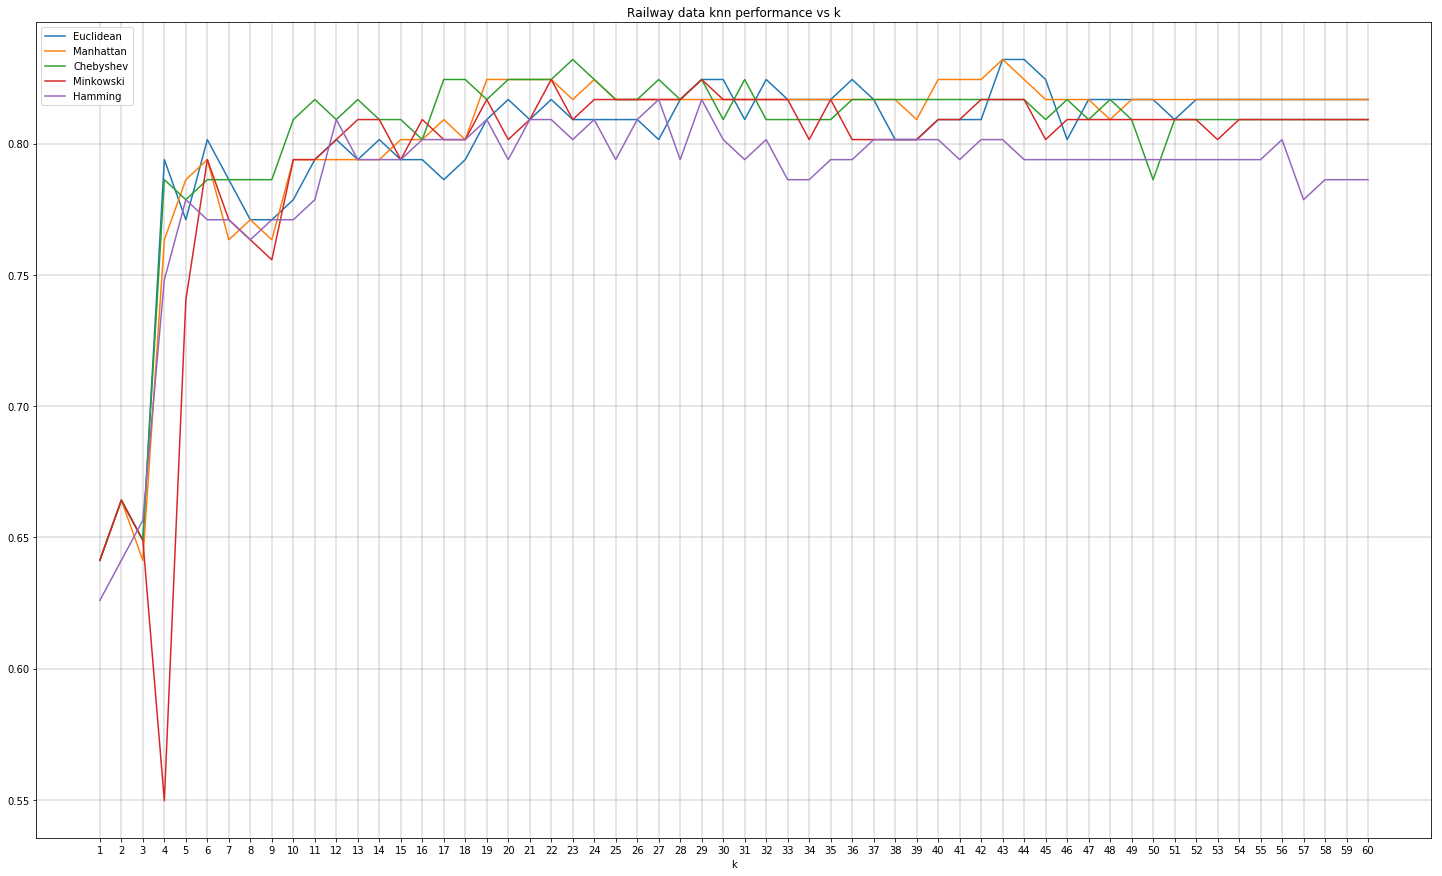

In [5]:
fig, ax = plt.subplots()
accuracy.plot(x = "k", y = distance_metrics, figsize = [25, 15], ax = ax)
plt.xticks(range(1, 61))
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Railway data knn performance vs k")

In [23]:
precision[precision["k"] == 23]["Chebyshev"].item()

{0: array([0.625]), 1: array([0.87850467])}

In [24]:
recall[recall["k"] == 23]["Chebyshev"].item()

{0: array([0.53571429]), 1: array([0.91262136])}

In [25]:
f1_score[f1_score["k"] == 23]["Chebyshev"].item()

{0: array([0.57692308]), 1: array([0.8952381])}

# k-means

In [26]:
loss = pd.DataFrame()
loss["k"] = range(2, 21)

loss_ = []
for k in range(2, 21):
    classifier = kmeansClassifier("Euclidean")
    classifier.Fit(x_train, k)
    loss_.append(classifier.ComputeLoss(x_train))
    print(k)
loss["loss"] = loss_

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [27]:
loss

,k,loss
0,2,4670.952790
1,3,3512.168275
2,4,3240.495057
3,5,2661.797017
4,6,2101.472274
5,7,1777.919087
6,8,1670.100170
7,9,1562.438610
8,10,1678.808787
9,11,1385.009395


Text(0.5,1,'Railway data kmeans loss vs k')

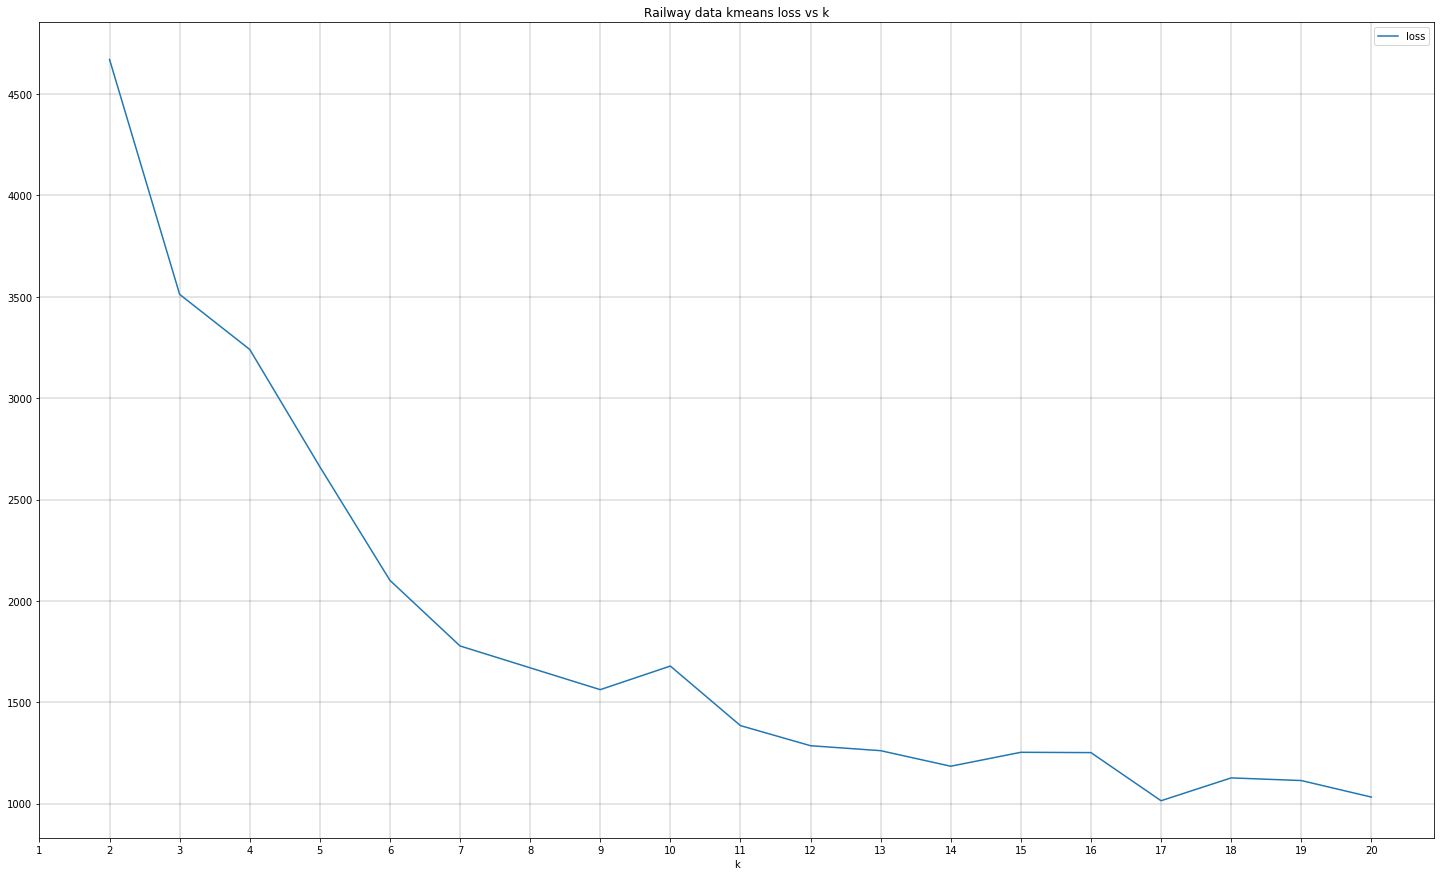

In [28]:
fig, ax = plt.subplots()
loss.plot(x = "k", y = "loss", figsize = [25, 15], ax = ax)
plt.xticks(range(1, 21))
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Railway data kmeans loss vs k")